# Predict Time Series Data

In [88]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
plt.style.use('fivethirtyeight')

# 1. Load Data

Load data from csv file

In [91]:
data = pd.read_csv('data_dummy.csv',index_col=[0], parse_dates=[0])

In [92]:
data.head()

,SCORE,GENRE,SUB_GENRE
DATE,,,
2019-03-10,0.007366,News,News:Hard News
2019-03-10,0.009462,Entertainment,Entertainment:Talkshow
2019-03-10,0.003111,Information,Information:Documentary
2019-03-10,0.009490,Information,Information:Documentary
2019-03-10,0.005317,Series,Series:Drama


In [93]:
data.shape

(9841, 3)

In [94]:
data = data.sort_values('DATE', ascending=True)

In [95]:
data.head()

,SCORE,GENRE,SUB_GENRE
DATE,,,
2018-01-01,0.003473,News,News:Hard News
2018-01-01,0.004519,Entertainment,Entertainment:Talkshow
2018-01-01,0.003277,Information,Information:Documentary
2018-01-01,0.002685,News,News:Hard News
2018-01-01,0.003551,News,News:Hard News


# 2. Data Preparation

1. Clean unused data <br>
2. Numerical-categorical feature split <br>
3. Check missing value <br>
4. Create categorical dummy for categorical feature <br>
5. Combine categorical numerical feature

### Clear Unused Data

In [96]:
split_date = '2019-10-01'
data = data.loc[data.index < split_date].copy()

In [97]:
data.tail()

,SCORE,GENRE,SUB_GENRE
DATE,,,
2019-09-30,0.003092,Information,Information:Documentary
2019-09-30,0.006461,Children,Children:Edutainment
2019-09-30,0.009370,Information,Information:Documentary
2019-09-30,0.012300,Entertainment,Entertainment:Comedy
2019-09-30,0.008563,Entertainment,Entertainment:Talkshow


### Numerical-Categorical Feature Split

In [98]:
x_num = data.drop(['GENRE','SUB_GENRE'], axis=1)

In [99]:
x_num.head()

,SCORE
DATE,
2018-01-01,0.003473
2018-01-01,0.004519
2018-01-01,0.003277
2018-01-01,0.002685
2018-01-01,0.003551


In [100]:
x_num.shape

(9398, 1)

In [101]:
label = ['GENRE','SUB_GENRE']
x_cat = data[label]

In [102]:
x_cat.head()

,GENRE,SUB_GENRE
DATE,,
2018-01-01,News,News:Hard News
2018-01-01,Entertainment,Entertainment:Talkshow
2018-01-01,Information,Information:Documentary
2018-01-01,News,News:Hard News
2018-01-01,News,News:Hard News


### Missing Value Checking

In [103]:
x_num.isnull().any()

SCORE    False
dtype: bool

In [104]:
x_cat.isnull().any()

GENRE        True
SUB_GENRE    True
dtype: bool

### Create Categorical Dummy for Categorical Feature

In [105]:
x_cat=pd.get_dummies(x_cat[label])

In [106]:
x_cat.head()

,GENRE_Children,GENRE_Entertainment,GENRE_Information,GENRE_News,GENRE_Series,SUB_GENRE_Children:Edutainment,SUB_GENRE_Entertainment:Comedy,SUB_GENRE_Entertainment:Talkshow,SUB_GENRE_Information:Documentary,SUB_GENRE_Information:Infotainment,SUB_GENRE_Information:TV Magazine,SUB_GENRE_News:Hard News,SUB_GENRE_News:TalkShow,SUB_GENRE_Series:Drama
DATE,,,,,,,,,,,,,,
2018-01-01,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2018-01-01,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2018-01-01,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [107]:
x_cat.shape

(9398, 14)

### Combine Categorical and Numerical Data

In [108]:
x_new = pd.concat([x_num, x_cat], axis=1)
x_new.head()

,SCORE,GENRE_Children,GENRE_Entertainment,GENRE_Information,GENRE_News,GENRE_Series,SUB_GENRE_Children:Edutainment,SUB_GENRE_Entertainment:Comedy,SUB_GENRE_Entertainment:Talkshow,SUB_GENRE_Information:Documentary,SUB_GENRE_Information:Infotainment,SUB_GENRE_Information:TV Magazine,SUB_GENRE_News:Hard News,SUB_GENRE_News:TalkShow,SUB_GENRE_Series:Drama
DATE,,,,,,,,,,,,,,,
2018-01-01,0.003473,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0.004519,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2018-01-01,0.003277,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2018-01-01,0.002685,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0.003551,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# 3. Data Exploration

1. Cek sebaran data <br>
2. Training-testing split <br>
3. Cek sebaran data training-testing

In [110]:
cek_sebaran = data.drop(["GENRE","SUB_GENRE"], axis=1)

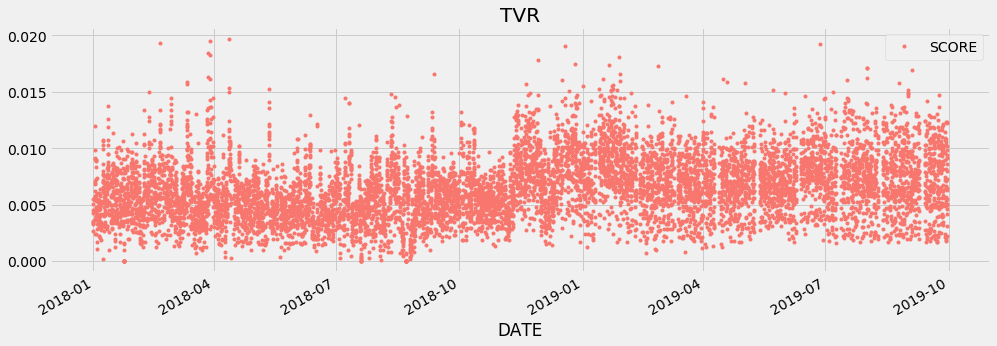

In [111]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = cek_sebaran.plot(style='.', figsize=(15,5), color=color_pal[0], title='TVR')

### Testing-Training Split

In [112]:
split_date = '2019-09-01'
data_train = x_new.loc[x_new.index < split_date].copy()
data_test = x_new.loc[x_new.index >= split_date].copy()

In [113]:
data_train.shape

(8951, 15)

In [114]:
data_test.shape

(447, 15)

In [115]:
data_train.head()

,SCORE,GENRE_Children,GENRE_Entertainment,GENRE_Information,GENRE_News,GENRE_Series,SUB_GENRE_Children:Edutainment,SUB_GENRE_Entertainment:Comedy,SUB_GENRE_Entertainment:Talkshow,SUB_GENRE_Information:Documentary,SUB_GENRE_Information:Infotainment,SUB_GENRE_Information:TV Magazine,SUB_GENRE_News:Hard News,SUB_GENRE_News:TalkShow,SUB_GENRE_Series:Drama
DATE,,,,,,,,,,,,,,,
2018-01-01,0.003473,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0.004519,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2018-01-01,0.003277,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2018-01-01,0.002685,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2018-01-01,0.003551,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [116]:
data_train.columns

Index(['SCORE', 'GENRE_Children', 'GENRE_Entertainment', 'GENRE_Information',
       'GENRE_News', 'GENRE_Series', 'SUB_GENRE_Children:Edutainment',
       'SUB_GENRE_Entertainment:Comedy', 'SUB_GENRE_Entertainment:Talkshow',
       'SUB_GENRE_Information:Documentary',
       'SUB_GENRE_Information:Infotainment',
       'SUB_GENRE_Information:TV Magazine', 'SUB_GENRE_News:Hard News',
       'SUB_GENRE_News:TalkShow', 'SUB_GENRE_Series:Drama'],
      dtype='object')

### Grafik Sebaran Testing & Training Data

In [117]:
split_date = '2019-09-01'
data_train1 = cek_sebaran.loc[cek_sebaran.index < split_date].copy()
data_test1 = cek_sebaran.loc[cek_sebaran.index >= split_date].copy()

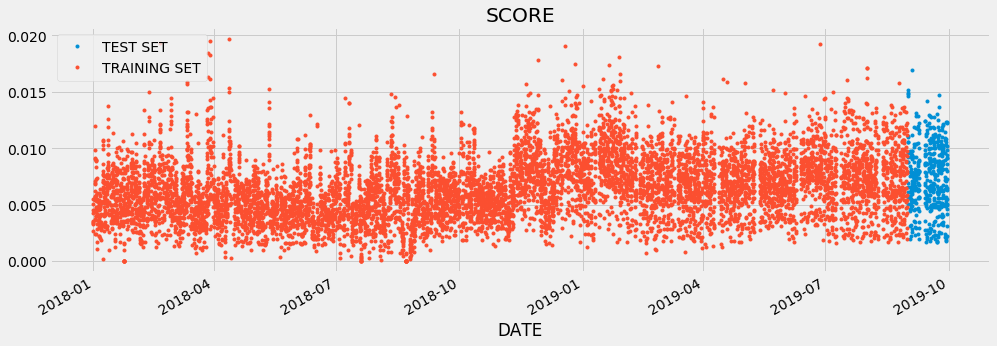

In [118]:
_ = data_test1 \
    .rename(columns={'SCORE': 'TEST SET'}) \
    .join(data_train1.rename(columns={'SCORE': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='SCORE', style='.')

# 4. Time Seires Feature Engineering

Create new numerical feature:
1. hour
2. dayofweek
3. quarter
4. month
5. year
6. dayofyear
7. dayofmonth
8. weekofyear

In [119]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['GENRE_Children'] = df['GENRE_Children']
    df['GENRE_Entertainment'] = df['GENRE_Entertainment']
    df['GENRE_Information'] = df['GENRE_Information']
    df['GENRE_News'] = df['GENRE_News']
    df['GENRE_Series'] = df['GENRE_Series']
    df['SUB_GENRE_Children:Edutainment'] = df['SUB_GENRE_Children:Edutainment']
    df['SUB_GENRE_Entertainment:Comedy'] = df['SUB_GENRE_Entertainment:Comedy']
    df['SUB_GENRE_Entertainment:Talkshow'] = df['SUB_GENRE_Entertainment:Talkshow']
    df['SUB_GENRE_Information:Documentary'] = df['SUB_GENRE_Information:Documentary']
    df['SUB_GENRE_Information:Infotainment'] = df['SUB_GENRE_Information:Infotainment']
    df['SUB_GENRE_Information:TV Magazine'] = df['SUB_GENRE_Information:TV Magazine']
    df['SUB_GENRE_News:Hard News'] = df['SUB_GENRE_News:Hard News']
    df['SUB_GENRE_News:TalkShow'] = df['SUB_GENRE_News:TalkShow']
    df['SUB_GENRE_Series:Drama'] = df['SUB_GENRE_Series:Drama']
    
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','GENRE_Children','GENRE_Entertainment','GENRE_Information','GENRE_News','GENRE_Series',
            'SUB_GENRE_Children:Edutainment','SUB_GENRE_Entertainment:Comedy','SUB_GENRE_Entertainment:Talkshow',
            'SUB_GENRE_Information:Documentary','SUB_GENRE_Information:Infotainment','SUB_GENRE_Information:TV Magazine',
            'SUB_GENRE_News:Hard News','SUB_GENRE_News:TalkShow','SUB_GENRE_Series:Drama']]
    if label:
        y = df[label]
        return X, y
    return X

In [120]:
X_train, y_train = create_features(data_train, label='SCORE')
X_test, y_test = create_features(data_test, label='SCORE')
X, y = create_features(x_new, label='SCORE')

In [121]:
X_train.tail()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,GENRE_Children,GENRE_Entertainment,...,GENRE_Series,SUB_GENRE_Children:Edutainment,SUB_GENRE_Entertainment:Comedy,SUB_GENRE_Entertainment:Talkshow,SUB_GENRE_Information:Documentary,SUB_GENRE_Information:Infotainment,SUB_GENRE_Information:TV Magazine,SUB_GENRE_News:Hard News,SUB_GENRE_News:TalkShow,SUB_GENRE_Series:Drama
DATE,,,,,,,,,,,,,,,,,,,,,
2019-08-31,0,5,3,8,2019,243,31,35,0,0,...,0,0,0,0,0,0,0,1,0,0
2019-08-31,0,5,3,8,2019,243,31,35,0,0,...,0,0,0,0,0,1,0,0,0,0
2019-08-31,0,5,3,8,2019,243,31,35,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-08-31,0,5,3,8,2019,243,31,35,0,0,...,0,0,0,0,1,0,0,0,0,0
2019-08-31,0,5,3,8,2019,243,31,35,0,0,...,1,0,0,0,0,0,0,0,0,1


# 5. Modeling Phase

1. Search best hyperparameter with RandomizedCV
2. Create feature importance barchart
3. Evaluate in training dataset
4. Evaluate in testing dataset

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [123]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import check_array

In [124]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [125]:
def bestparam_randCV(model,hyperparam,x_train, y_train, n_iter=1000):
    
    hyperparam = hyperparam
    randomizedCV = RandomizedSearchCV(model, param_distributions = hyperparam, cv = 10,
                                          n_iter = n_iter, scoring = 'neg_mean_squared_error', n_jobs=-1, 
                                          random_state = 42, verbose = True)
    randomizedCV.fit(x_train, y_train)
    
    #print (randomizedCV.cv_results_)
    print ('Best MSE', randomizedCV.score(x_train, y_train))
    print ('Best Param', randomizedCV.best_params_)
    return randomizedCV

### Randomized Cross Validation

In [126]:
reg         = DecisionTreeRegressor()             

hyperparam =  {'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]}
 
n_iter     = 100
best_dt1   = bestparam_randCV(reg, hyperparam, X_train, y_train, n_iter)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


Best MSE -3.376024096137808e-06
Best Param {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}


In [127]:
dt1 = DecisionTreeRegressor(
                        max_features      = best_dt1.best_params_.get('max_features'),
                        max_depth         = best_dt1.best_params_.get('max_depth'),
                        min_samples_split = best_dt1.best_params_.get('min_samples_split'),
                        min_samples_leaf  = best_dt1.best_params_.get('min_samples_leaf'))

In [128]:
result_dt1 = dt1.fit(X_train, y_train)

### Feature Importances

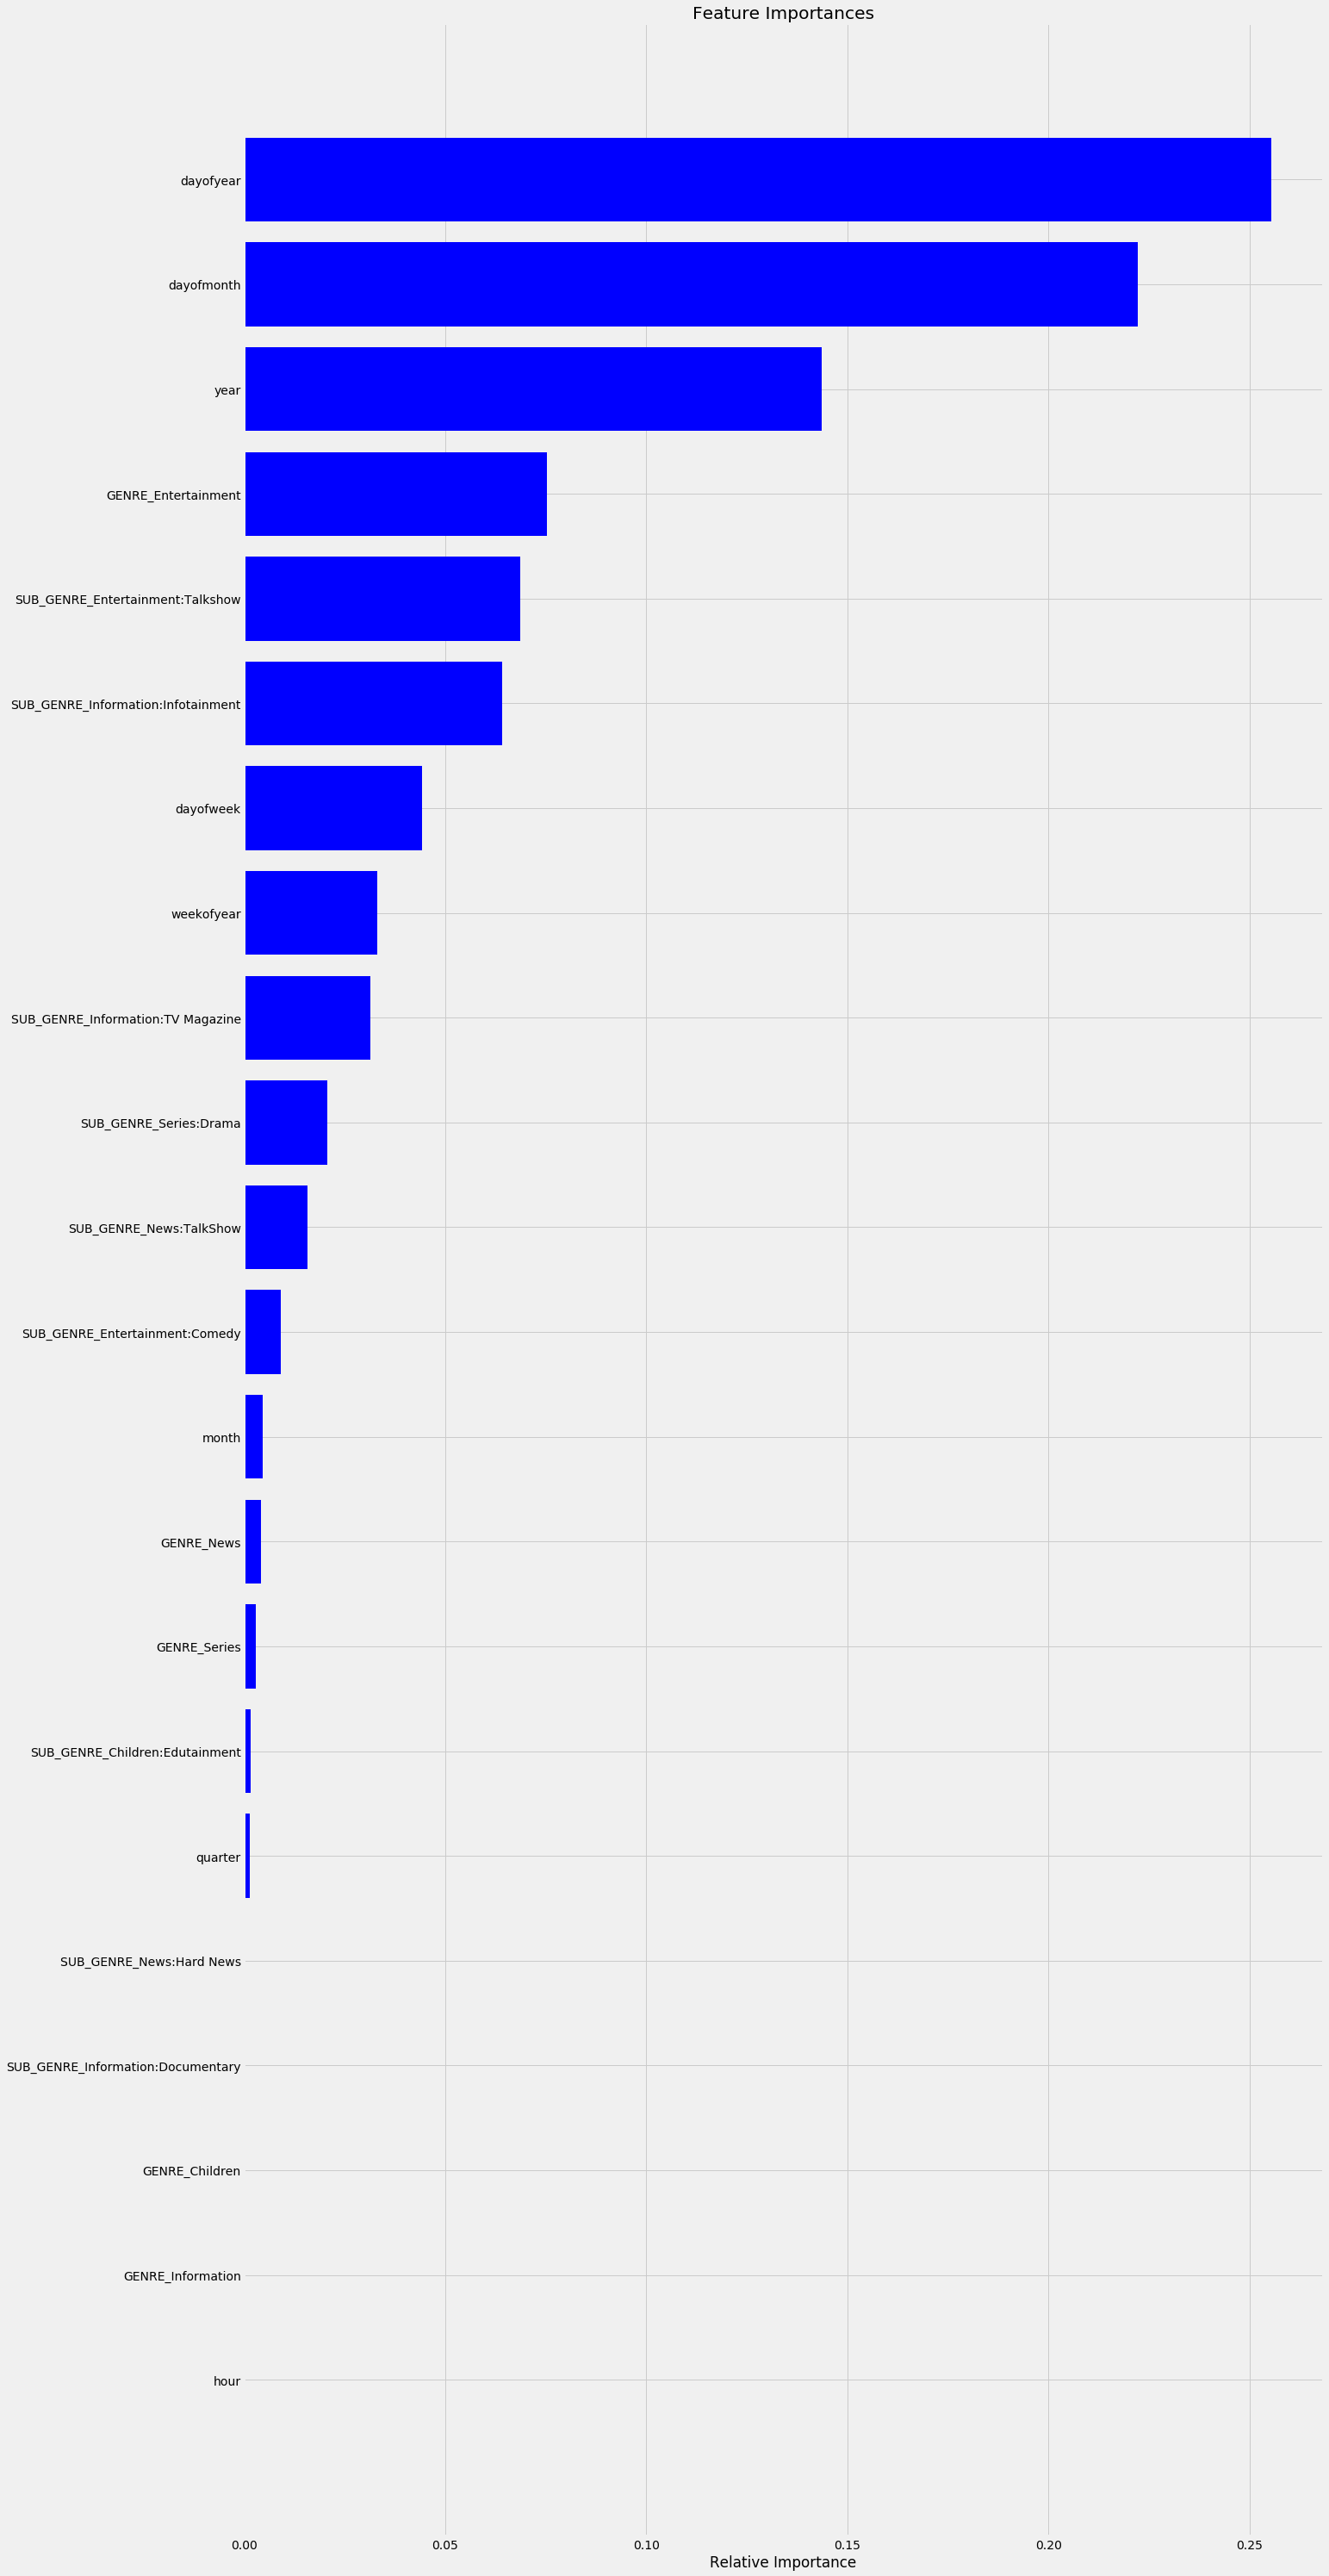

In [129]:
## Jika tidak jelas grafiknya ambil file .png saja yang di samping nama filenya "filename.png"
importances = result_dt1.feature_importances_
indices = np.argsort(importances)
features=X_train.columns
plt.figure(figsize=(20,50))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('filename.png', dpi=300)

### Forecast on Training Set

In [130]:
data_train['SCORE_Prediction'] = result_dt1.predict(X_train)
data_all = pd.concat([data_test, data_train], sort=False)

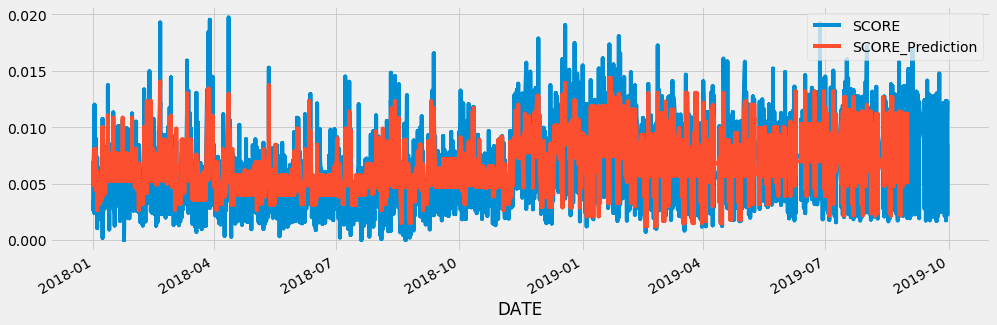

In [131]:
_ = data_all[['SCORE','SCORE_Prediction']].plot(figsize=(15, 5))

### Evaluation on Train Set

In [132]:
#RMSE
sqrt(mean_squared_error(y_true=data_train['SCORE'],
                   y_pred=data_train['SCORE_Prediction']))

0.0018373960096119205

In [133]:
#MAE
mean_absolute_error(y_true=data_train['SCORE'],
                   y_pred=data_train['SCORE_Prediction'])

0.0014108431762138926

In [134]:
#MAPE
mean_absolute_percentage_error(y_true=data_train['SCORE'],
                   y_pred=data_train['SCORE_Prediction'])

C:\Users\940088\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


inf

### Forecast on Test Set

In [135]:
data_test['SCORE_Prediction'] = result_dt1.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

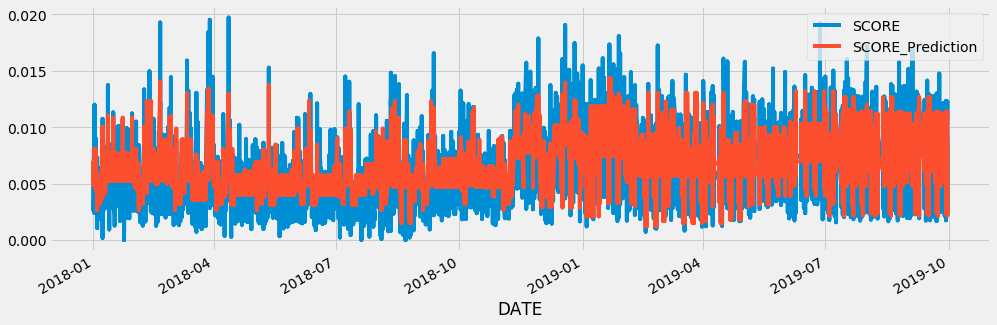

In [136]:
_ = data_all[['SCORE','SCORE_Prediction']].plot(figsize=(15, 5))

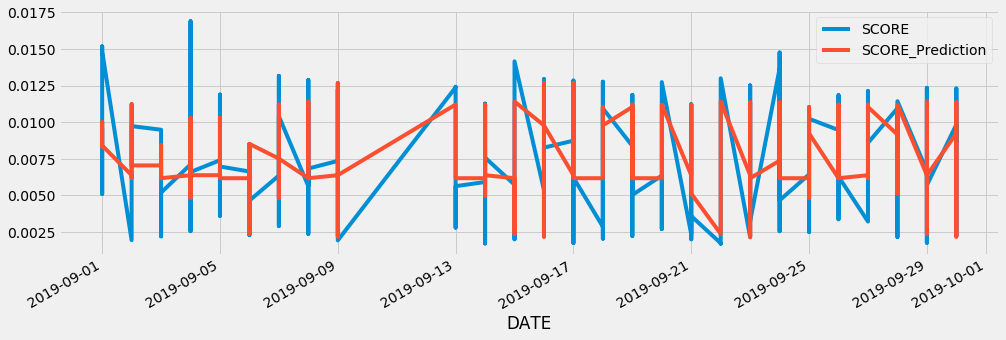

In [137]:
_ = data_test[['SCORE','SCORE_Prediction']].plot(figsize=(15, 5))

### Evaluation on Test Set

In [138]:
#RMSE
sqrt(mean_squared_error(y_true=data_test['SCORE'],
                   y_pred=data_test['SCORE_Prediction']))

0.0024438764662480877

In [139]:
#MAE
mean_absolute_error(y_true=data_test['SCORE'],
                   y_pred=data_test['SCORE_Prediction'])

0.001917790220412588

In [140]:
#MAPE
mean_absolute_percentage_error(y_true=data_test['SCORE'],
                   y_pred=data_test['SCORE_Prediction'])

36.31786878445722

# 6. Predict

Predict value (if real value have been published, calculate its error and absolute error for evaluation) 

In [141]:
data_test['error'] = data_test['SCORE'] - data_test['SCORE_Prediction']
data_test['abs_error'] = data_test['error'].apply(np.abs)
error_by_day = data_test.groupby(['year','month','dayofmonth']) \
    .mean()[['SCORE','SCORE_Prediction','error','abs_error']]

In [142]:
error_by_day.sort_values('error', ascending=True).head(20)

SCORE  SCORE_Prediction     error  abs_error
year month dayofmonth                                                 
2019 9     2           0.005952          0.007046 -0.001094   0.001882
           3           0.005980          0.006728 -0.000749   0.001872
           6           0.005760          0.006499 -0.000739   0.001499
           21          0.006395          0.007012 -0.000617   0.002144
           22          0.006277          0.006747 -0.000470   0.002172
           17          0.007473          0.007900 -0.000427   0.002072
           16          0.007337          0.007627 -0.000290   0.001902
           30          0.007287          0.007443 -0.000156   0.001626
           5           0.007576          0.007697 -0.000121   0.001528
           29          0.006708          0.006747 -0.000039   0.002031
           26          0.007714          0.007727 -0.000012   0.001761
           9           0.007209          0.007206  0.000003   0.001737
           18          0.007660          0.007651  0.000009   0.001939
           23          0.007459          0.007443  0.000017   0.001750
           19          0.007769          0.007727  0.000042   0.001766
           14          0.007056          0.007001  0.000055   0.001929
           25          0.007447          0.007371  0.000076   0.001980
           28          0.007130          0.007012  0.000118   0.001949
           27          0.007779          0.007557  0.000222   0.001886
           13          0.007811          0.007557  0.000254   0.001660